**COORDINATE REFERENCE SYSTEMS**

In [5]:
import geopandas as gpd
import pandas as pd
regions = gpd.read_file('../../../data/ghana/Map_of_Regions_in_Ghana.shp')
# show Coordinate reference system (EPSG 32630 -> Mercator projection)
print(regions.crs)

EPSG:32630


In [6]:
facilities_df = pd.read_csv('../../../data/ghana/health_facilities.csv')
facilities = gpd.GeoDataFrame(facilities_df, geometry=gpd.points_from_xy(facilities_df.Longitude, facilities_df.Latitude))
facilities.crs = {'init': 'epsg:4326'}
facilities.head()

/Users/asaucedo/workspaces/python3/.venv/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


Region          District             FacilityName           Type  \
0  Ashanti     Offinso North        A.M.E Zion Clinic         Clinic   
1  Ashanti  Bekwai Municipal        Abenkyiman Clinic         Clinic   
2  Ashanti      Adansi North     Aboabo Health Centre  Health Centre   
3  Ashanti     Afigya-Kwabre  Aboabogya Health Centre  Health Centre   
4  Ashanti            Kwabre     Aboaso Health Centre  Health Centre   

           Town   Ownership  Latitude  Longitude                  geometry  
0      Afrancho        CHAG   7.40801   -1.96317  POINT (-1.96317 7.40801)  
1  Anwiankwanta     Private   6.46312   -1.58592  POINT (-1.58592 6.46312)  
2   Aboabo No 2  Government   6.22393   -1.34982  POINT (-1.34982 6.22393)  
3     Aboabogya  Government   6.84177   -1.61098  POINT (-1.61098 6.84177)  
4        Aboaso  Government   6.84177   -1.61098  POINT (-1.61098 6.84177)

<Axes: >

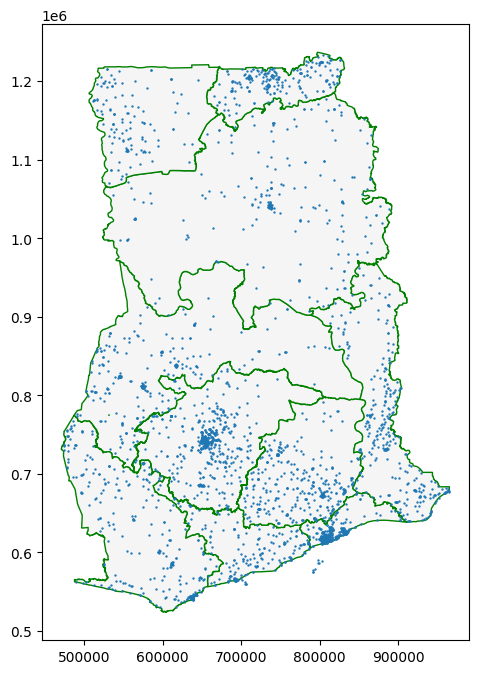

In [7]:
ax = regions.plot(figsize=(8,8), color='whitesmoke', linestyle='-', edgecolor='green')
facilities.to_crs(epsg=32630).plot(ax=ax, markersize=0.5)

In [8]:
regions.to_crs('+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs')

Region                                           geometry
0        Ashanti  POLYGON ((-1.30985 7.62302, -1.30786 7.62198, ...
1    Brong Ahafo  POLYGON ((-2.54567 8.76089, -2.54473 8.76071, ...
2        Central  POLYGON ((-2.06723 6.29473, -2.06658 6.2942, -...
3        Eastern  POLYGON ((-0.21751 7.21009, -0.21747 7.20993, ...
4  Greater Accra  POLYGON ((0.23456 6.10986, 0.23484 6.10974, 0....
5       Northern  POLYGON ((-0.09041 10.71194, -0.09061 10.70918...
6     Upper East  POLYGON ((-0.14402 11.1173, -0.14393 11.11679,...
7     Upper West  POLYGON ((-1.54582 11.04027, -1.54411 11.01019...
8          Volta  POLYGON ((0.62403 7.90125, 0.62264 7.90174, 0....
9        Western  POLYGON ((-3.08737 6.97758, -3.08573 6.97675, ...

<Axes: >

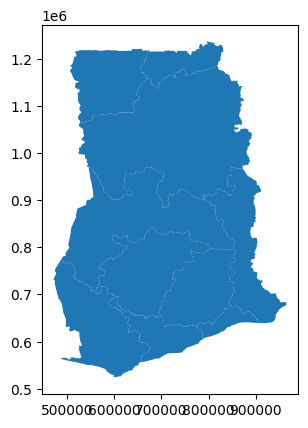

In [9]:
regions.plot()

In [10]:
# show attributes of geometry column
facilities.geometry.head().x

0   -1.96317
1   -1.58592
2   -1.34982
3   -1.61098
4   -1.61098
dtype: float64

In [11]:
facilities.loc[:,['geometry']]

geometry
0     POINT (-1.96317 7.40801)
1     POINT (-1.58592 6.46312)
2     POINT (-1.34982 6.22393)
3     POINT (-1.61098 6.84177)
4     POINT (-1.61098 6.84177)
...                        ...
3751               POINT EMPTY
3752               POINT EMPTY
3753               POINT EMPTY
3754               POINT EMPTY
3755               POINT EMPTY

[3756 rows x 1 columns]

In [12]:
point_data = {'x': facilities.geometry.head().x, 'y': facilities.geometry.head().y}
pd.DataFrame(point_data).head()

x        y
0 -1.96317  7.40801
1 -1.58592  6.46312
2 -1.34982  6.22393
3 -1.61098  6.84177
4 -1.61098  6.84177

In [13]:
polygon_data = {'area': regions.geometry.head().area}
pd.DataFrame(polygon_data).head()

area
0  2.437902e+10
1  4.009817e+10
2  9.665627e+09
3  1.898763e+10
4  3.706511e+09

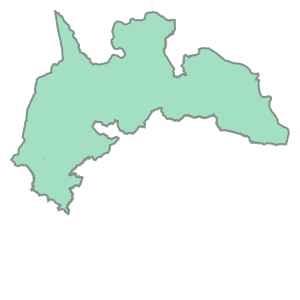

In [14]:
#regions.geometry.head()
regions.geometry.head().loc[1]

In [17]:
regions.explore('Region')